In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from IPython.display import display
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/fruitspec-lab/anaconda3/envs/FsCounterGPUtest/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_cv_org = pd.read_csv("/media/fruitspec-lab/cam175/customers_new/features_1308_new_translator.csv")

In [3]:
# or2009_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/OR2009/cv_features.csv"
# BEERAMU0_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/BEERAMU0/cv_features.csv"
# ORSHICHT_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/ORSCHIST/cv_features.csv"
# cv_features_paths = [or2009_cv_features, BEERAMU0_cv_features, ORSHICHT_cv_features]
# mothca_exp_cv = pd.concat([pd.read_csv(p) for p in cv_features_paths])
# df_cv_org = pd.concat([df_cv_org,mothca_exp_cv]).reset_index(drop = True)
# df_cv_org

# unrelated- testing for new feature: cv decay rate

In [4]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
f_df = read_f_df(cfg)
df_cv_w_f = add_fs(df_cv_org, f_df).reset_index(drop = True)
plot_fruit_var = get_plot_fruit_variety_df(cfg)
plot_fruit_var = pd.concat([plot_fruit_var, pd.DataFrame({"block_name" : ["OR2009", "BEERAMU0", "ORSCHIST"],
                                         "fruit_type":["orange"]*3})]).reset_index(drop=True)
df_cv_w_f = pd.merge(df_cv_w_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")

In [5]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# df_cv_w_f["% hidden"] = (df_cv_w_f["F"] - df_cv_w_f["cv1"])/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4], [x["cv2/cv1"], x["cv3/cv1"], x["cv4/cv1"], x["cv5/cv1"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")


In [6]:
# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

In [7]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# cv_ratio_cols = ["cv1","cv2", "cv3", "cv4", "cv5"]
# df_cv_w_f["% hidden"] = df_cv_w_f["cv1"]/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4,5], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4,5], [x["cv1"], x["cv2"], x["cv3"], x["cv4"], x["cv5"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")
# plt.show()

# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4,5], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

## filter

In [8]:
df_cv = df_cv_org[df_cv_org["customer"].isin(["DEWAGD", "PROPAL", "MOTCHA"])] #, "FOWLER", "MOTCHA"
df_cv = df_cv[df_cv["name"].str.endswith("1") | df_cv["customer"].isin(["FOWLER", "MOTCHA"])]
df_cv["block_name"] = df_cv["block_name"].replace({"2020injx": "2020injX", "injertos": "Injertos"})

## Add Fs

In [9]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
cfg.drop_customer: ["MOTCHADS"]
f_df = read_f_df(cfg)

### handling motcha and fowler

In [10]:
f_df_serinal = f_df[~f_df["tree_serial"].isna()]
base_tree_name = f_df_serinal["block_name"] + "_" + "R0_T" + f_df_serinal["tree_serial"].astype(int).astype(str)
tree_new_name = base_tree_name + "_S" + f_df_serinal["side"].replace({"A":1, "B":2}).astype(int).astype(str)
tree_new_name = tree_new_name.apply(lambda x: f'{x.split("_")[1]}_{x.split("_")[3]}_{x.split("_")[2]}')
f_df_serinal["base_tree_name"] = base_tree_name
f_df_serinal["tree_new_name"] = tree_new_name
# f_df.loc[~f_df["tree_serial"].isna(), "new_tree_name"] = f_df_serinal["tree_new_name"]


### adding

In [11]:
df_f = add_fs(df_cv, f_df)

In [12]:
plot_fruit_var = get_plot_fruit_variety_df(cfg)
plot_fruit_var = pd.concat([plot_fruit_var, pd.DataFrame({"block_name" : ["OR2009", "BEERAMU0", "ORSCHIST"],
                                         "fruit_type":["orange"]*3})]).reset_index(drop=True)
df_f = pd.merge(df_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")
hidden_range, cv_range, F_range, fruits_exclude = get_ranges(cfg)
df_f = process_fruit_type(df_f, fruits_exclude, cfg)

In [13]:
df_f["full_name"] = df_f["customer"] + df_f["block_name"] + df_f["name"]

In [14]:
f_df_serinal["full_name"] = f_df_serinal["customer_name"] + f_df_serinal["block_name"] + f_df_serinal["new_tree_name"]
df_f.loc[df_f["customer"].isin(["FOWLER", "MOTCHA"]), "name"] = df_f[df_f["customer"].isin(["FOWLER", "MOTCHA"])]["full_name"].map(dict(zip(f_df_serinal["full_name"], f_df_serinal["tree_new_name"])))



## Rename trees

In [15]:
cv_cols = ["cv1", "cv2", "cv3", "cv4" ,"cv5"]

In [16]:
df_f["base_tree_name"] = df_f["block_name"] + "_"  + df_f["name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[-1])
counts = df_f["base_tree_name"].value_counts()>1
df_f = df_f[df_f["base_tree_name"].map(dict(zip(counts.index, counts.values)))]

In [17]:
df_f["side"] = df_f["name"].str.contains("S1")*1 +1

In [18]:
grouped_trees = df_f.groupby("base_tree_name")[cv_cols + ["F", "lemon", "mandarin"]].mean()
grouped_trees[cv_cols] = grouped_trees[cv_cols]*2
grouped_trees["base_tree_name"] = list(grouped_trees.index)
grouped_trees["block_name"] = grouped_trees["base_tree_name"].apply(lambda x: x.split("_")[0])


In [19]:
## checking for difference between sides

In [20]:
from scipy.stats import ttest_1samp
df_f_org = df_f.reset_index(drop=True)
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]
df_f_grp_by = df_f_org.groupby(["block_name", "side"])[cv_F_cols].mean()
df_f_grp_by.reset_index(inplace=True)
res = pd.DataFrame()
pv = []
stat = []
for cv in range(1,6):
    df_pivot = df_f_grp_by.pivot_table(index='block_name', columns='side', values=f'cv{cv}/F')
    abs_diff = np.abs(df_pivot[2]-df_pivot[1])
    ttest_res = ttest_1samp(abs_diff, 0)
    pv.append(ttest_res[1])
    stat.append(ttest_res[0])
    res[f'cv{cv}/F'] = abs_diff

display(res)
display(pd.concat([pd.DataFrame(res.mean()), pd.DataFrame(res.std())], axis = 1))
pd.DataFrame({"t-statistic": stat, "pvalue": pv}, index = cv_F_cols)

,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F
block_name,,,,,
2004XXXX,0.153782,0.161697,0.145129,0.147247,0.146150
2005XXXX,0.033466,0.001323,0.021906,0.031071,0.033328
2018NINA,0.021445,0.042776,0.059832,0.080112,0.068156
2018XXXX,0.003458,0.077473,0.117048,0.120462,0.126656
94000000,0.360614,0.352563,0.361741,0.346724,0.313329
DWDBCL46,0.007771,0.012215,0.021770,0.021293,0.016109
DWDBCN51,0.071444,0.051496,0.042979,0.049579,0.045480
DWDBLE33,0.003286,0.010400,0.010461,0.019362,0.022752
DWDBLE34,0.009549,0.010057,0.025095,0.025744,0.027232


,0,0
cv1/F,0.136834,0.148429
cv2/F,0.091048,0.080952
cv3/F,0.083999,0.072945
cv4/F,0.080852,0.065400
cv5/F,0.075256,0.060263


,t-statistic,pvalue
cv1/F,4.878127,4.225999e-05
cv2/F,5.951426,2.404781e-06
cv3/F,6.093413,1.654629e-06
cv4/F,6.541782,5.143163e-07
cv5/F,6.607986,4.335543e-07


In [21]:
df_f_org[df_f_org["side"] == 1][cv_F_cols].mean().round(2)

cv1/F    0.69
cv2/F    0.47
cv3/F    0.39
cv4/F    0.35
cv5/F    0.31
dtype: float64

In [22]:
df_f_org[df_f_org["side"] == 2][cv_F_cols].mean().round(2)

cv1/F    0.70
cv2/F    0.45
cv3/F    0.37
cv4/F    0.32
cv5/F    0.29
dtype: float64

# F_modeling

### Load data

In [23]:
df_f_org = grouped_trees.reset_index(drop=True)

In [24]:
df_f_org = df_f[df_f["side"]==2].reset_index(drop=True)

In [25]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [26]:
# df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

### Short EDA

In [27]:
df_f_org[cv_F_cols].mean().round(2)

cv1/F    0.70
cv2/F    0.45
cv3/F    0.37
cv4/F    0.32
cv5/F    0.29
dtype: float64

In [28]:
pd.concat([df_f_org.groupby(["block_name"])[cv_F_cols].mean(), df_f_org.groupby(["block_name"])["cv1"].count()], axis = 1).round(2)


,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F,cv1
block_name,,,,,,
2004XXXX,0.44,0.27,0.22,0.19,0.16,5
2005XXXX,0.76,0.50,0.41,0.34,0.29,6
2018NINA,0.89,0.57,0.47,0.40,0.36,5
2018XXXX,0.87,0.58,0.44,0.38,0.34,8
94000000,0.67,0.42,0.33,0.28,0.25,6
DWDBCL46,0.40,0.30,0.26,0.23,0.20,8
DWDBCN51,0.56,0.38,0.32,0.27,0.24,5
DWDBLE33,0.57,0.43,0.37,0.33,0.30,3
DWDBLE34,0.63,0.48,0.43,0.39,0.36,2


In [29]:
df_f_org.groupby(["block_name"])["cv1", "cv2"].count()

,cv1,cv2
block_name,,
2004XXXX,5,5
2005XXXX,6,6
2018NINA,5,5
2018XXXX,8,8
94000000,6,6
DWDBCL46,8,8
DWDBCN51,5,5
DWDBLE33,3,3
DWDBLE34,2,2


### CV-F graphs

<Figure size 1000x600 with 0 Axes>

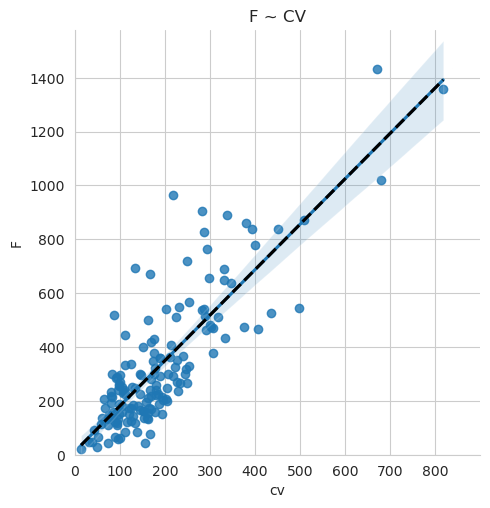

In [30]:

df = df_f_org.copy()
col = 'cv1'
max_val = np.min(np.max(df[[col, "F"]].values, axis=0))

plt.figure(figsize=(10, 6))  # Adjust figure size

# Enable grid lines
sns.set_style("whitegrid")

ax = sns.lmplot(data=df, x=col, y="F", palette="Blues")  # Customize color palette
sns.regplot(data=df, x=col, y="F", scatter_kws={'s': 5}, order=1, ci=0, ax=ax.axes[0, 0],
            x_ci=0, color="black", line_kws={"ls": "--"},scatter=False)  # Adjust scatter marker size and line style

plt.xlim(0, np.max(df[col] * 1.1))  # Adjust x-axis limits
plt.ylim(0, np.max(df["F"] * 1.1))  # Adjust y-axis limits

plt.xlabel("cv")  # Set x-axis label
plt.ylabel("F")  # Set y-axis label
plt.title("F ~ CV")  # Set plot title

plt.show()

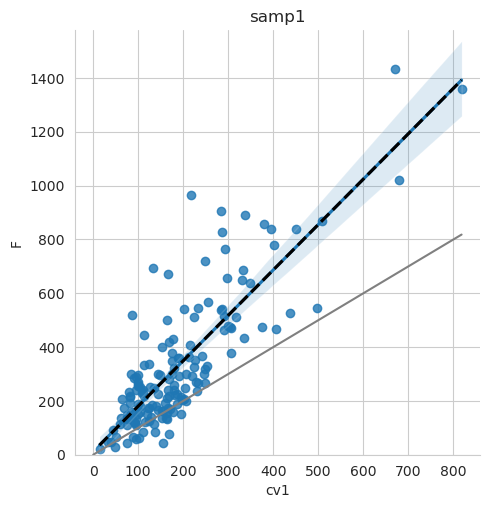

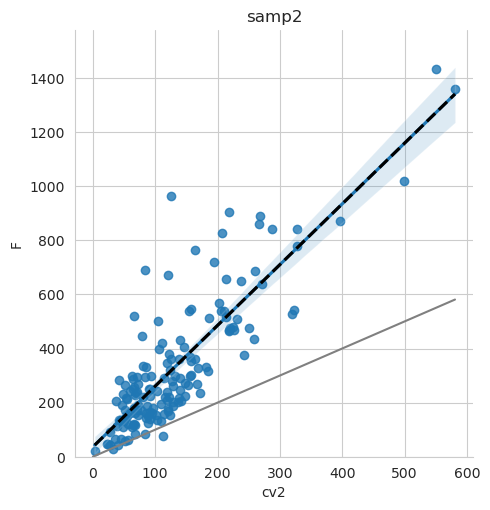

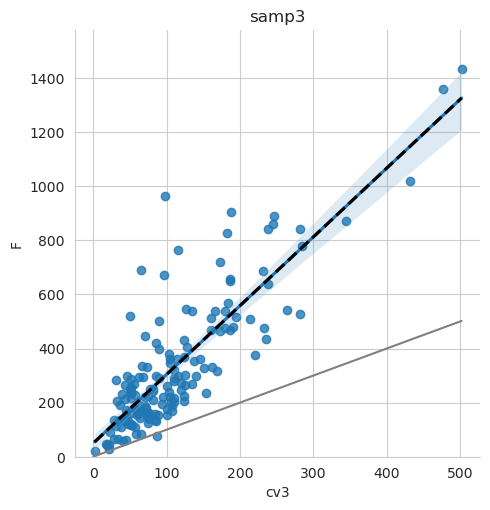

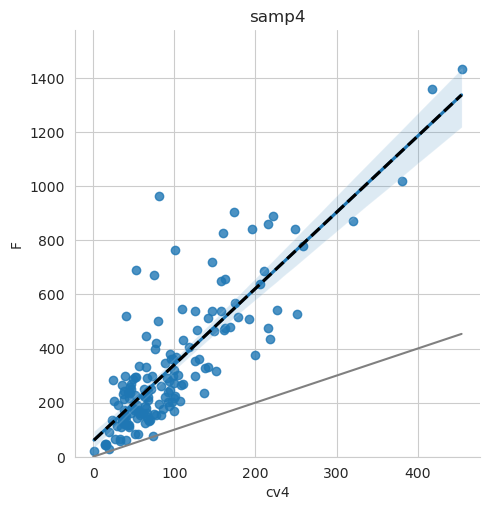

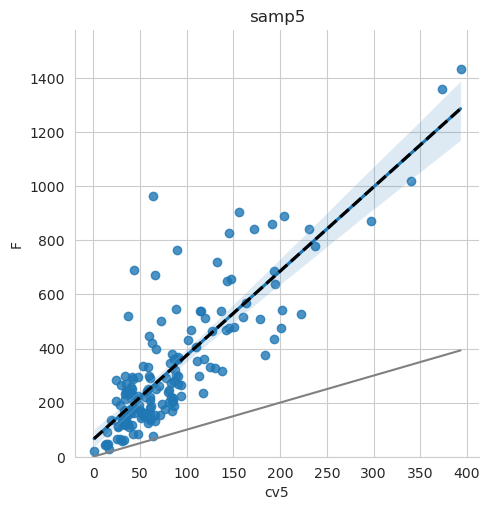

In [31]:
def plot_F_cv(df,min_samp = "", hue = None, title= "", col = ""):
    if col == "":
        col = f"cv{min_samp}"
    max_val = np.min(np.max(df[[col, "F"]].values, axis = 0))
    ax = sns.lmplot(data = df, x = col, y="F", hue = hue)
    sns.regplot(data = df, x = col, y="F", scatter_kws={'s':2}, order = 1,ci=0, ax=ax.axes[0,0],
               x_ci = 0, color = "black", line_kws={"ls":"--"},scatter=False)
    plt.plot([0, max_val], [0, max_val], color='grey')
    plt.ylim(0, np.max(df["F"]*1.1))
    plt.title(title)
    plt.show()

for i in range(1,6)    :
    plot_F_cv(df_f_org,i, title = f"samp{i}")
    

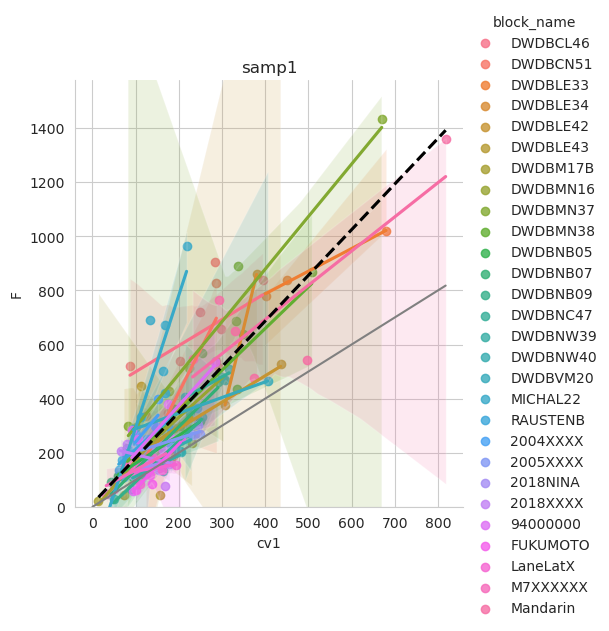

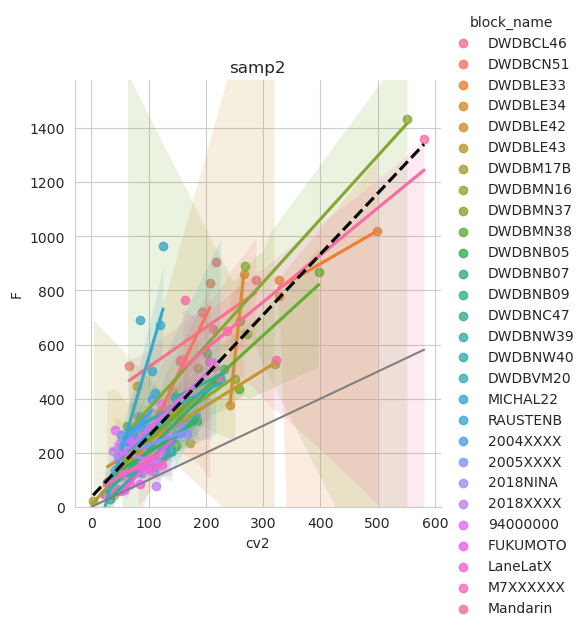

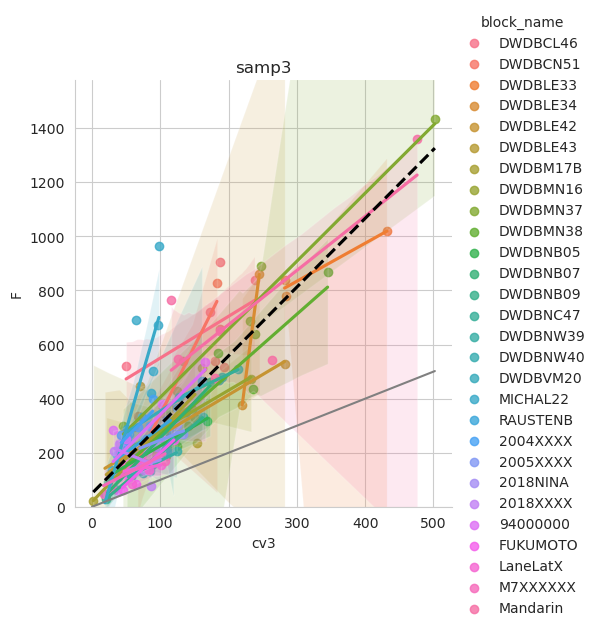

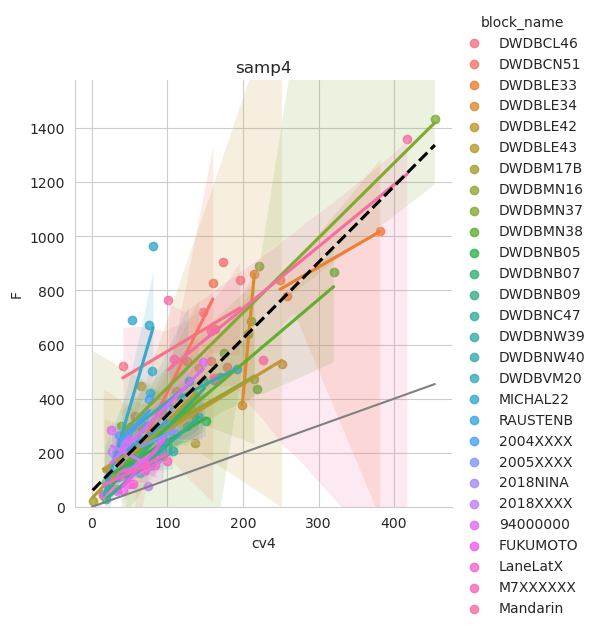

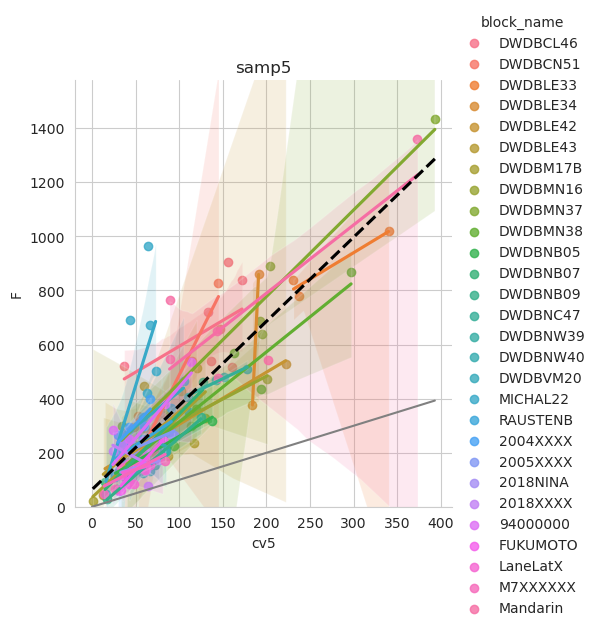

In [32]:
for i in range(1,6):
    plot_F_cv(df_f_org,i,"block_name", f"samp{i}")

### Modeling

In [33]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

from MHS.scoring import cross_validate_with_mean
from sklearn.linear_model import LinearRegression, PoissonRegressor

class MaxLinearRegressor(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
    
    def predict(self, X):
        predicted_values = super().predict(X)
        return np.array([max(p, 0) for p in predicted_values])

In [34]:
def get_model_res(df, cv=1, include_fruits = True, include_interaction=True, group_col = "block_name"):
    groups = df[group_col]
    if include_fruits:
        X = df[[f"cv{cv}", "lemon", "mandarin"]]
        if include_interaction:
            X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
            X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
    else:
        X = df[[f"cv{cv}"]]
    y = df["F"]
    model = LinearRegression(fit_intercept = False)
    gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res=True)
    return gr_res, ge_std, tree_res, tree_std, preds

In [35]:
results_list = []
include_fruits = True
include_interaction=True
for include_fruits in [True, False]:
    for include_interaction in [True, False]:
        for cv in range(1,6):
            # 2 sided
            df = grouped_trees.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "2_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            # 1 side 2 trees
            df = df_f.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "1_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            
            #side A only
            df = df_f[df_f["side"] == 1].reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "A", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            
            #side B only
            df = df_f[df_f["side"] == 2].reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "B", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
summary_res = pd.DataFrame(results_list)   
summary_res

true: 3105.0,    pred: 2232.3653794929055. (28.10 %) (RAUSTENB)
true: 4166.0,    pred: 3770.668304754966. (9.49 %) (MICHAL22)
true: 1443.0,    pred: 1599.6094174456045. (10.85 %) (2018XXXX)
true: 5240.0,    pred: 4137.222303723324. (21.05 %) (DWDBCL46)
true: 732.0,    pred: 649.7635517562903. (11.23 %) (M7XXXXXX)
true: 845.0,    pred: 967.9409991986722. (14.55 %) (LaneLatX)
true: 1503.0,    pred: 1653.5254110773146. (10.01 %) (2005XXXX)
true: 1770.0,    pred: 1453.9383465021438. (17.86 %) (94000000)
true: 4340.0,    pred: 5189.523899884215. (19.57 %) (Mandarin)
true: 1677.0,    pred: 1970.8713815212323. (17.52 %) (DWDBMN16)
true: 747.0,    pred: 952.8230716246775. (27.55 %) (2018NINA)
true: 1998.0,    pred: 2272.704031040729. (13.75 %) (DWDBCN51)
true: 1379.0,    pred: 1391.0040493459778. (0.87 %) (DWDBLE42)
true: 1381.0,    pred: 1358.569942687034. (1.62 %) (DWDBLE43)
true: 1258.0,    pred: 1532.9046217911464. (21.85 %) (DWDBM17B)
true: 3949.0,    pred: 3750.2968509621287. (5.03 %) (D

true: 3105.0,    pred: 2095.207468357841. (32.52 %) (RAUSTENB)
true: 4166.0,    pred: 2744.8124003961516. (34.11 %) (MICHAL22)
true: 1443.0,    pred: 1355.95435757203. (6.03 %) (2018XXXX)
true: 5240.0,    pred: 4304.3931562477965. (17.86 %) (DWDBCL46)
true: 732.0,    pred: 764.9058963644779. (4.50 %) (M7XXXXXX)
true: 845.0,    pred: 1054.5927319084676. (24.80 %) (LaneLatX)
true: 1503.0,    pred: 1583.2317747610828. (5.34 %) (2005XXXX)
true: 1770.0,    pred: 1206.6462924950674. (31.83 %) (94000000)
true: 4340.0,    pred: 4140.328104724431. (4.60 %) (Mandarin)
true: 1677.0,    pred: 2486.214558143479. (48.25 %) (DWDBMN16)
true: 747.0,    pred: 891.2585437800722. (19.31 %) (2018NINA)
true: 1998.0,    pred: 2145.6535269595065. (7.39 %) (DWDBCN51)
true: 1379.0,    pred: 1572.2845668094997. (14.02 %) (DWDBLE42)
true: 1381.0,    pred: 1456.3820683031236. (5.46 %) (DWDBLE43)
true: 1258.0,    pred: 1947.5543070992292. (54.81 %) (DWDBM17B)
true: 3949.0,    pred: 3707.546073145457. (6.11 %) (DWDB

true: 1379.0,    pred: 1300.166353709403. (5.72 %) (DWDBLE42)
true: 1381.0,    pred: 1326.5263157272552. (3.94 %) (DWDBLE43)
true: 1258.0,    pred: 1603.2829060390695. (27.45 %) (DWDBM17B)
true: 3949.0,    pred: 3698.0674955241266. (6.35 %) (DWDBMN37)
true: 2314.0,    pred: 2328.706119010335. (0.64 %) (DWDBMN38)
true: 1113.0,    pred: 1437.0815424295652. (29.12 %) (DWDBNB05)
true: 1177.0,    pred: 1073.480595467888. (8.80 %) (DWDBNB07)
true: 799.0,    pred: 1076.4045675986895. (34.72 %) (DWDBNB09)
true: 744.0,    pred: 1222.088759079415. (64.26 %) (DWDBNW39)
true: 662.0,    pred: 923.5800268739997. (39.51 %) (FUKUMOTO)
true: 1493.0,    pred: 1328.4081928175888. (11.02 %) (2004XXXX)
true: 1866.0,    pred: 1426.3196960607238. (23.56 %) (DWDBNC47)
true: 913.0,    pred: 1367.0492044042599. (49.73 %) (DWDBNW40)
true: 2640.0,    pred: 2700.7438971725196. (2.30 %) (DWDBLE33)
true: 1121.0,    pred: 1119.72736602928. (0.11 %) (DWDBVM20)
true: 1236.0,    pred: 1290.4172707742596. (4.40 %) (DWDBL

true: 3105.0,    pred: 1985.5939527707837. (36.05 %) (RAUSTENB)
true: 4166.0,    pred: 2687.3406539003413. (35.49 %) (MICHAL22)
true: 1443.0,    pred: 1266.9244102532257. (12.20 %) (2018XXXX)
true: 5240.0,    pred: 4304.138886452532. (17.86 %) (DWDBCL46)
true: 732.0,    pred: 759.984853565503. (3.82 %) (M7XXXXXX)
true: 845.0,    pred: 989.0216702064173. (17.04 %) (LaneLatX)
true: 1503.0,    pred: 1416.4777275455479. (5.76 %) (2005XXXX)
true: 1770.0,    pred: 1160.2659511597647. (34.45 %) (94000000)
true: 4340.0,    pred: 4106.690016614834. (5.38 %) (Mandarin)
true: 1677.0,    pred: 2540.0007857774035. (51.46 %) (DWDBMN16)
true: 747.0,    pred: 822.9548555364556. (10.17 %) (2018NINA)
true: 1998.0,    pred: 2083.5971439843665. (4.28 %) (DWDBCN51)
true: 1379.0,    pred: 1575.8266328860823. (14.27 %) (DWDBLE42)
true: 1381.0,    pred: 1315.9800174543486. (4.71 %) (DWDBLE43)
true: 1258.0,    pred: 1895.7459445499112. (50.70 %) (DWDBM17B)
true: 3949.0,    pred: 3842.569863296929. (2.70 %) (DW

true: 1113.0,    pred: 1394.2501869266787. (25.27 %) (DWDBNB05)
true: 1177.0,    pred: 1313.294650828619. (11.58 %) (DWDBNB07)
true: 799.0,    pred: 1163.3787294440663. (45.60 %) (DWDBNB09)
true: 744.0,    pred: 1174.8545188457333. (57.91 %) (DWDBNW39)
true: 662.0,    pred: 1008.2388014166527. (52.30 %) (FUKUMOTO)
true: 1493.0,    pred: 947.2063366788536. (36.56 %) (2004XXXX)
true: 1866.0,    pred: 2045.0690570627623. (9.60 %) (DWDBNC47)
true: 913.0,    pred: 1245.4575081451737. (36.41 %) (DWDBNW40)
true: 2640.0,    pred: 2857.120173146966. (8.22 %) (DWDBLE33)
true: 1121.0,    pred: 952.8587597393783. (15.00 %) (DWDBVM20)
true: 1236.0,    pred: 1318.7389199312413. (6.69 %) (DWDBLE34)
0.3385514794770516 0.1354416835575127
true: 3105.0,    pred: 2745.5684600849486. (11.58 %) (RAUSTENB)
true: 4166.0,    pred: 2428.680598967292. (41.70 %) (MICHAL22)
true: 1443.0,    pred: 1895.267613696568. (31.34 %) (2018XXXX)
true: 5240.0,    pred: 3717.6232218548266. (29.05 %) (DWDBCL46)
true: 732.0,   

true: 5240.0,    pred: 3699.873756740828. (29.39 %) (DWDBCL46)
true: 732.0,    pred: 856.4472679300566. (17.00 %) (M7XXXXXX)
true: 845.0,    pred: 1176.0471319230965. (39.18 %) (LaneLatX)
true: 1503.0,    pred: 1771.2237516321884. (17.85 %) (2005XXXX)
true: 1770.0,    pred: 1382.7413099339149. (21.88 %) (94000000)
true: 4340.0,    pred: 3796.889815950348. (12.51 %) (Mandarin)
true: 1677.0,    pred: 1932.8529153006075. (15.26 %) (DWDBMN16)
true: 747.0,    pred: 996.1958328193509. (33.36 %) (2018NINA)
true: 1998.0,    pred: 1567.680236512823. (21.54 %) (DWDBCN51)
true: 1379.0,    pred: 1539.5130300897624. (11.64 %) (DWDBLE42)
true: 1381.0,    pred: 1380.6543504651336. (0.03 %) (DWDBLE43)
true: 1258.0,    pred: 1254.6280456114. (0.27 %) (DWDBM17B)
true: 3949.0,    pred: 3551.815766161264. (10.06 %) (DWDBMN37)
true: 2314.0,    pred: 2694.0925135834887. (16.43 %) (DWDBMN38)
true: 1113.0,    pred: 1394.2501869266787. (25.27 %) (DWDBNB05)
true: 1177.0,    pred: 1313.294650828619. (11.58 %) (D

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std,include_fruits,include_interaction
0,2_sided,1,0.174940,0.121199,0.391278,0.264532,True,True
1,1_sided,1,0.178499,0.111733,0.453914,0.347071,True,True
2,A,1,0.162401,0.122303,0.446512,0.321053,True,True
3,B,1,0.220917,0.136987,0.451708,0.376407,True,True
4,2_sided,2,0.163132,0.114008,0.350101,0.223591,True,True
5,1_sided,2,0.163227,0.111184,0.422068,0.314956,True,True
6,A,2,0.160079,0.109471,0.427792,0.295284,True,True
7,B,2,0.204409,0.145978,0.405806,0.345510,True,True
8,2_sided,3,0.171625,0.112184,0.353835,0.248310,True,True
9,1_sided,3,0.169855,0.111772,0.430090,0.340298,True,True


In [36]:
summary_res.iloc[:20, :-2].round(2)

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std
0,2_sided,1,0.17,0.12,0.39,0.26
1,1_sided,1,0.18,0.11,0.45,0.35
2,A,1,0.16,0.12,0.45,0.32
3,B,1,0.22,0.14,0.45,0.38
4,2_sided,2,0.16,0.11,0.35,0.22
5,1_sided,2,0.16,0.11,0.42,0.31
6,A,2,0.16,0.11,0.43,0.30
7,B,2,0.20,0.15,0.41,0.35
8,2_sided,3,0.17,0.11,0.35,0.25
9,1_sided,3,0.17,0.11,0.43,0.34


In [37]:
# cv = 1
# df = grouped_trees.copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)


In [38]:
# df = df_f.reset_index(drop=True).copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)